### HW Class 6 (R Functions)

> NAME: $\color{red}{\text{    Edwin Ruiz    }}$
> 
> PID: $\color{red}{\text{    A17136339     }}$

In [1]:
install.packages("bio3d")
library(bio3d)
ls("package:bio3d")


The downloaded binary packages are in
	/var/folders/vw/6c5wjngs433234dthdjypz800000gn/T//RtmptQF66A/downloaded_packages


[1] "aa.index"             "aa.table"             "aa123"               
  [4] "aa2index"             "aa2mass"              "aa321"               
  [7] "aanma"                "aanma.pdb"            "aanma.pdbs"          
 [10] "aln2html"             "amsm.xyz"             "angle.xyz"           
 [13] "as.fasta"             "as.pdb"               "as.pdb.default"      
 [16] "as.pdb.mol2"          "as.pdb.prmtop"        "as.select"           
 [19] "as.xyz"               "atom.index"           "atom.select"         
 [22] "atom.select.mol2"     "atom.select.pdb"      "atom.select.pdbs"    
 [25] "atom.select.prmtop"   "atom2ele"             "atom2ele.default"    
 [28] "atom2ele.pdb"         "atom2mass"            "atom2mass.default"   
 [31] "atom2mass.pdb"        "atom2xyz"             "basename.pdb"        
 [34] "bhattacharyya"        "bhattacharyya.array"  "bhattacharyya.enma"  
 [37] "bhattacharyya.matrix" "bhattacharyya.nma"    "bhattacharyya.pca"   
 [40] "binding.site"         "biounit"              "blast.pdb"           
 [43] "bounds"               "bounds.sse"           "build.hessian"       
 [46] "bwr.colors"           "cat.pdb"              "chain.pdb"           
 [49] "check.utility"        "clean.pdb"            "cmap"                
 [52] "cmap.default"         "cmap.pdb"             "cmap.pdbs"           
 [55] "cmap.xyz"             "cna"                  "cna.dccm"            
 [58] "cna.ensmb"            "cnapath"              "com"                 
 [61] "com.pdb"              "com.xyz"              "combine.select"      
 [64] "community.aln"        "community.tree"       "consensus"           
 [67] "conserv"              "convert.pdb"          "core.cmap"           
 [70] "core.find"            "core.find.default"    "core.find.pdb"       
 [73] "core.find.pdbs"       "cov.enma"             "cov.nma"             
 [76] "covsoverlap"          "covsoverlap.enma"     "covsoverlap.nma"     
 [79] "dccm"                 "dccm.egnm"            "dccm.enma"           
 [82] "dccm.gnm"             "dccm.nma"             "dccm.pca"            
 [85] "dccm.xyz"             "deformation.nma"      "diag.ind"            
 [88] "difference.vector"    "dist.xyz"             "dm"                  
 [91] "dm.pdb"               "dm.pdbs"              "dm.xyz"              
 [94] "dssp"                 "dssp.pdb"             "dssp.pdbs"           
 [97] "dssp.xyz"             "elements"             "entropy"             
[100] "ff.aaenm"             "ff.aaenm2"            "ff.anm"              
[103] "ff.calpha"            "ff.pfanm"             "ff.reach"            
[106] "ff.sdenm"             "filter.cmap"          "filter.dccm"         
[109] "filter.identity"      "filter.rmsd"          "fit.xyz"             
[112] "fluct.nma"            "formula2mass"         "gap.inspect"         
[115] "geostas"              "geostas.default"      "geostas.enma"        
[118] "geostas.nma"          "geostas.pdb"          "geostas.pdbs"        
[121] "geostas.xyz"          "get.blast"            "get.pdb"             
[124] "get.seq"              "gnm"                  "gnm.pdb"             
[127] "gnm.pdbs"             "hclustplot"           "hivp"                
[130] "hmmer"                "identify.cna"         "inner.prod"          
[133] "inspect.connectivity" "is.gap"               "is.mol2"             
[136] "is.pdb"               "is.pdbs"              "is.select"           
[139] "is.xyz"               "kinesin"              "layout.cna"          
[142] "lbio3d"               "load.enmff"           "mask"                
[145] "mask.dccm"            "mktrj"                "mktrj.enma"          
[148] "mktrj.nma"            "mktrj.pca"            "mono.colors"         
[151] "motif.find"           "mustang"              "network.amendment"   
[154] "nma"                  "nma.pdb"              "nma.pdbs"            
[157] "normalize.vector"     "orient.pdb"           "overlap"             
[160] "pairwise"           

In [2]:
"aa.index" %in% ls("package:bio3d")

[1] TRUE

  Note: Accessing on-line PDB file
  Note: Accessing on-line PDB file
   PDB has ALT records, taking A only, rm.alt=TRUE
  Note: Accessing on-line PDB file


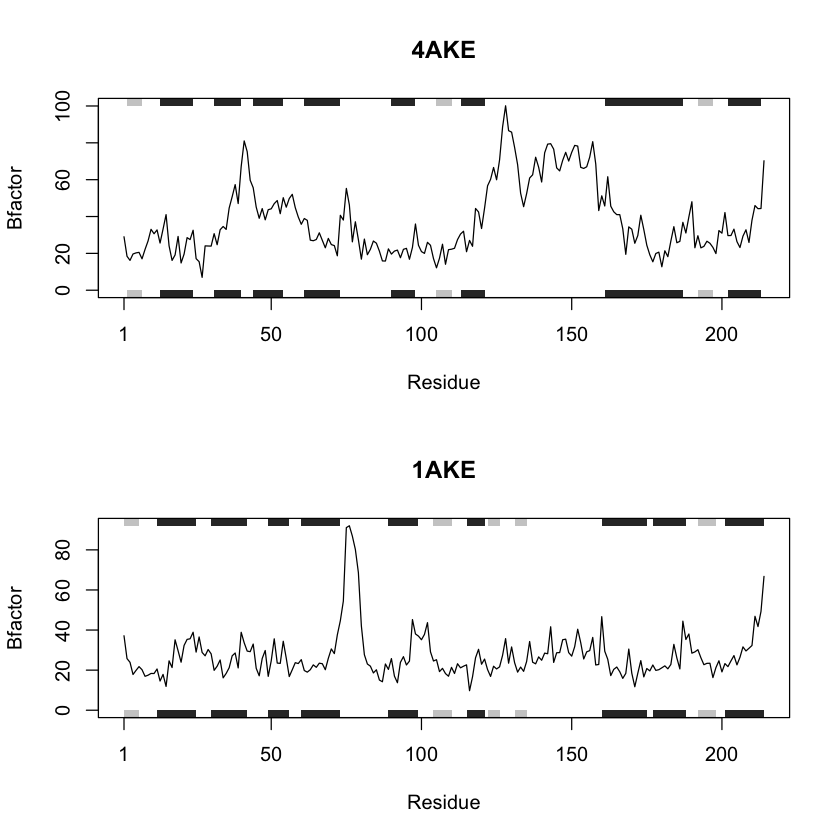

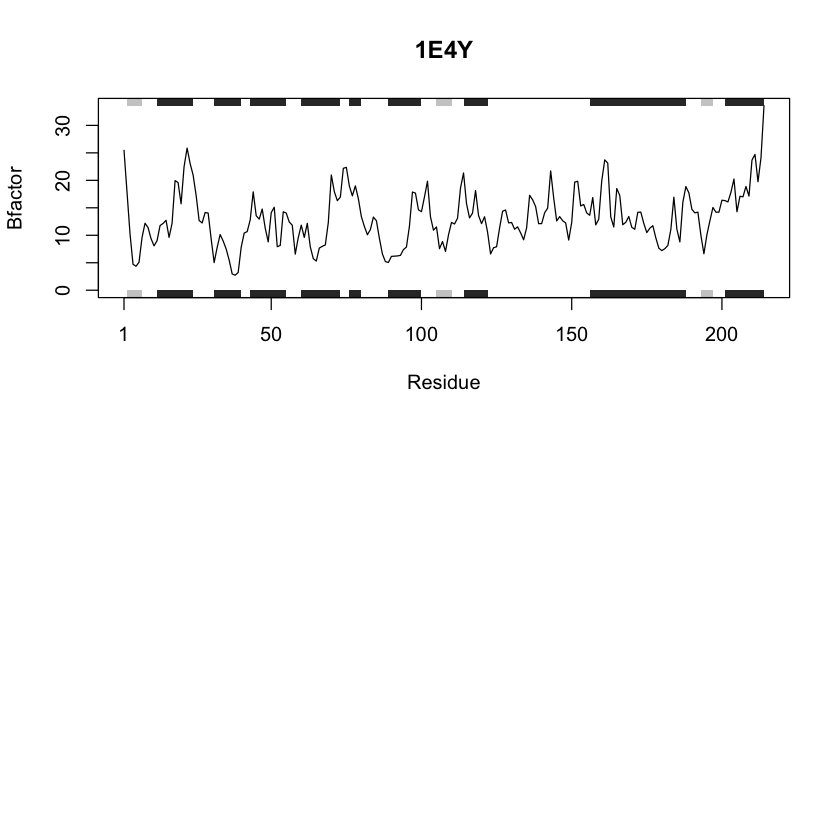

In [3]:
#reading protein data
s1 <- read.pdb("4AKE") # kinase with drug
s2 <- read.pdb("1AKE") # kinase no drug
s3 <- read.pdb("1E4Y") # kinase with drug

#trimming
s1.chainA <- trim.pdb(s1, chain="A", elety="CA")
s2.chainA <- trim.pdb(s2, chain="A", elety="CA")
s3.chainA <- trim.pdb(s3, chain="A", elety="CA") 

#extracting b-factors
s1.b <- s1.chainA$atom$b
s2.b <- s2.chainA$atom$b
s3.b <- s3.chainA$atom$b

#plotting b-factors
par(mfrow=c(2, 1))
plotb3(s1.b, sse=s1.chainA, typ="l", ylab="Bfactor", main="4AKE")
plotb3(s2.b, sse=s2.chainA, typ="l", ylab="Bfactor", main="1AKE")
plotb3(s3.b, sse=s3.chainA, typ="l", ylab="Bfactor", main="1E4Y")

Plot of 3459 data points


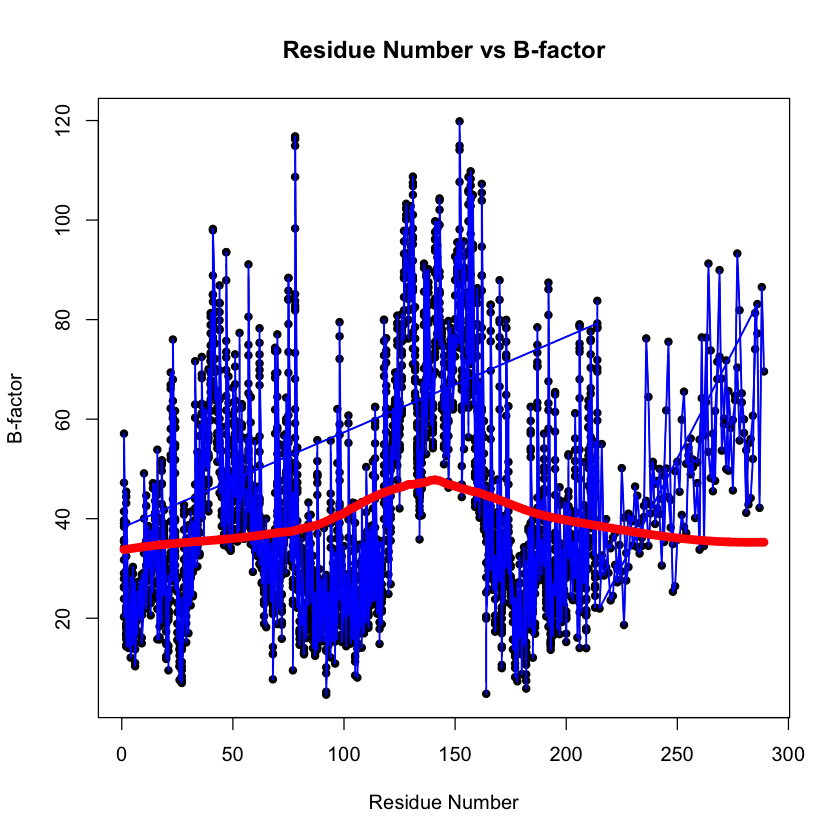

Plot of 3804 data points


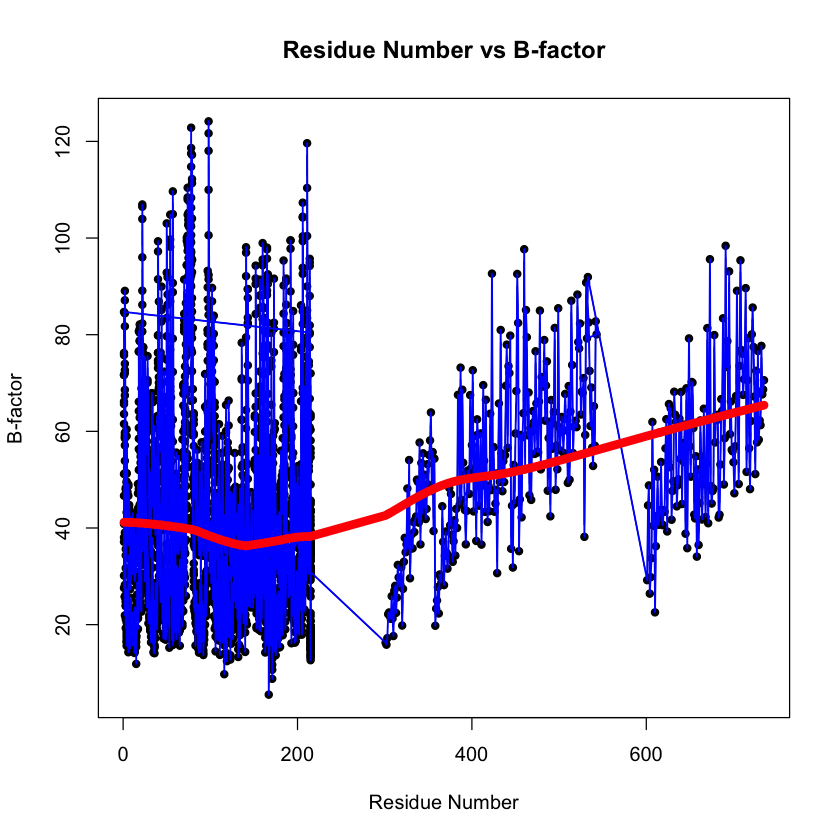

Plot of 3428 data points


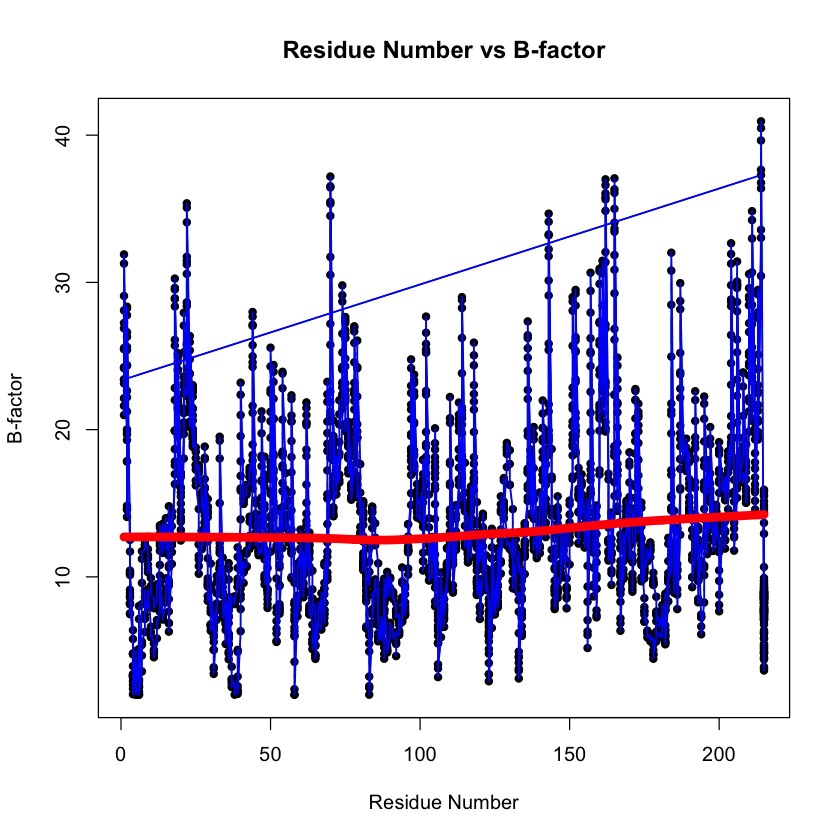

In [4]:
#This function plots the residue number (amino acid position) vs b-factor (Atom mobility measure)
plot_residue_bfactor <- function(protein) { #protein object
        
    #validating input
    if (is.null(protein$atom$b) || is.null(protein$atom$resno)) 
    {stop("The B-factors or residue numbers are not valid")}

    #B-factors & residue numbers are extracted here
    protein.b <- protein$atom$b
    residue_numbers <- protein$atom$resno
    
    #checking array equality between residue numbers & B-factors
    if (length(protein.b) != length(residue_numbers)) 
    {stop("Mismatch between the number of B-factors and residue numbers.")}

    #creating the plot outputs
    plot(residue_numbers, protein.b, type = "b", col = "black", pch = 20, cex = 1.2,
         xlab = "Residue Number", ylab = "B-factor", main = "Residue Number vs B-factor")
    
    #data point lines configurations
    lines(residue_numbers, protein.b, type = "l", col = "blue", lwd = 1.5)
    
    #trend line configurations
    lines(lowess(residue_numbers, protein.b), col = "red", lwd = 7)
    
    #output dimension debugging
    cat("Plot of", length(protein.b), "data points\n")
}
#Plotting s1, s2, s3 data
plot_residue_bfactor(s1)
plot_residue_bfactor(s2)
plot_residue_bfactor(s3)